In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk

In [2]:
data=pd.read_csv(r'C:\Users\HP\Desktop\social_media_sentiments-analaysis\Dataset\training_data.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
data.shape

(31962, 3)

In [5]:
data.size

95886

In [6]:
data.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [7]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [8]:
data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

# DATA CLEANING

# removing handles from tweet

In [9]:
def remove_handles(tweet):
    found=re.findall("@[\w]*",tweet)
    for i in found:
        tweet=re.sub(i,'',tweet)
    return tweet

In [10]:
vector=np.vectorize(remove_handles)
data['tweet without handles']=vector(data['tweet'])

In [11]:
data.head()

,id,label,tweet,tweet without handles
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [12]:
data.tail()

,id,label,tweet,tweet without handles
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso..."
31961,31962,0,thank you @user for you follow,thank you for you follow


# removing punctuations and other symbols

In [13]:
def remove_punc_sym(tweet):
    tweet=tweet.str.replace("[^a-zA-Z#\s]","")
    return tweet
    

In [14]:
data['tweet without handles']=remove_punc_sym(data['tweet without handles'])

In [15]:
data.head()

,id,label,tweet,tweet without handles
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i cant use cause the...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [16]:
data.tail()

,id,label,tweet,tweet without handles
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",#sikh #temple vandalised in in #calgary #wso ...
31961,31962,0,thank you @user for you follow,thank you for you follow


# removing short words

In [17]:
data['tweet without handles']=data['tweet without handles'].str.lower()
data['tweet without handles']=data['tweet without handles'].apply(lambda tweet: ' '.join([word for word in str(tweet).split() if len(word)>3]))

In [18]:
data.head()

,id,label,tweet,tweet without handles
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cant cause they dont offer...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


# stemming

In [19]:
#tokennizing the words
tokenized_tweets = data['tweet without handles'].apply(lambda x: x.split())
tokenized_tweets.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cant, cause, they, don...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tweet without handles, dtype: object

In [20]:
from nltk import PorterStemmer
ps=PorterStemmer()
tokenized_tweets=tokenized_tweets.apply(lambda x: [ps.stem(word) for word in x])
tokenized_tweets.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, cant, caus, they, dont,...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tweet without handles, dtype: object

In [21]:
# converting the tokennized tweets back to tweet form
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i] = ' '.join(tokenized_tweets[i])
data['tweet without handles'] = tokenized_tweets
data.head()

,id,label,tweet,tweet without handles
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit cant caus they dont offer w...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


In [22]:
data.tail()

,id,label,tweet,tweet without handles
31957,31958,0,ate @user isz that youuu?ðððððð...,that youuu
31958,31959,0,to see nina turner on the airwaves trying to...,nina turner airwav tri wrap herself mantl genu...
31959,31960,0,listening to sad songs on a monday morning otw...,listen song monday morn work
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",#sikh #templ vandalis #calgari #wso condemn
31961,31962,0,thank you @user for you follow,thank follow


# Count Vectorizer

In [23]:
from sklearn.feature_extraction.text import CountVectorizer


In [24]:
vectorizer = CountVectorizer(max_features=6000,stop_words='english',ngram_range=(1,4))
x = vectorizer.fit_transform(data['tweet without handles']).toarray()

In [25]:
x.shape

(31962, 6000)

In [26]:
y=data['label']

In [27]:
y.shape

(31962,)

In [28]:
from sklearn.model_selection import train_test_split
xtrain_count,xtest_count,ytrain_count,ytest_count=train_test_split(x,y,test_size=0.2,random_state=3)

In [29]:
vectorizer.get_feature_names()

['aamp',
 'aap',
 'abandon',
 'abil',
 'abl',
 'abov',
 'abov expect',
 'abrahamhick',
 'abrahamhick lawofattract',
 'abrahamhick lawofattract healthi',
 'abrahamhick lawofattract healthi heal',
 'absolut',
 'abund',
 'abus',
 'academi',
 'accent',
 'accept',
 'accept sale',
 'accept sale photographi',
 'access',
 'accessori',
 'accid',
 'accord',
 'account',
 'accus',
 'ace',
 'ach',
 'achiev',
 'acn',
 'acn altwaystoh',
 'acn altwaystoh healthi',
 'acn altwaystoh healthi heal',
 'act',
 'act like',
 'action',
 'activ',
 'activist',
 'actor',
 'actor seeklearn',
 'actor seeklearn stafresh',
 'actorslif',
 'actress',
 'actual',
 'ad',
 'adam',
 'adapt',
 'adapt environ',
 'adapt environ need',
 'adapt environ need tear',
 'add',
 'addict',
 'addit',
 'address',
 'adel',
 'adida',
 'admit',
 'adopt',
 'ador',
 'adult',
 'adv',
 'advanc',
 'advantag',
 'adveis',
 'adventur',
 'advic',
 'advoc',
 'affair',
 'affect',
 'affirm',
 'afford',
 'afghan',
 'afraid',
 'africa',
 'african',
 'aft

In [30]:
vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 6000,
 'min_df': 1,
 'ngram_range': (1, 4),
 'preprocessor': None,
 'stop_words': 'english',
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [31]:
count_df = pd.DataFrame(x,columns = vectorizer.get_feature_names())
count_df.head()

,aamp,aap,abandon,abil,abl,abov,abov expect,abrahamhick,abrahamhick lawofattract,abrahamhick lawofattract healthi,...,youv,yum,yummi,yyc,zara,zealand,zelda,zen,zero,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# By TDIDF vectorizer

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
vectorizer_tdif = TfidfVectorizer(max_features=6000,stop_words='english',ngram_range=(1,4))
x_tdif = vectorizer_tdif.fit_transform(data['tweet without handles'])


In [31]:
x_tdif = x_tdif.todense()
x_tdif

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
y_tdif=data['label']
y_tdif

0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
xtrain_tdif,xtest_tdif,ytrain_tdif,ytest_tdif = train_test_split(x_tdif,y_tdif,test_size=0.2,random_state=3)

In [34]:
xtrain_tdif.shape

(25569, 6000)

In [35]:
ytrain_tdif.shape

(25569,)

# K neighbours Classifier

# Using Count vectorizer

In [39]:
from sklearn.neighbors import KNeighborsClassifier
neighbors=KNeighborsClassifier(n_neighbors=1)

In [40]:
neighbors.fit(xtrain_count,ytrain_count)

KNeighborsClassifier(n_neighbors=1)

In [41]:
Y_pred=neighbors.predict(xtest_count)

In [44]:
from sklearn import metrics
count_accuracy_score=metrics.accuracy_score(ytest_count,Y_pred)

In [46]:
print(count_accuracy_score*100)

93.94650398873769


In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print((classification_report(ytest_count,Y_pred)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5950
           1       0.58      0.48      0.52       443

    accuracy                           0.94      6393
   macro avg       0.77      0.73      0.75      6393
weighted avg       0.93      0.94      0.94      6393



In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
error=[]
for i in range(1,10,2):
    neighbors=KNeighborsClassifier(n_neighbors=i)
    neighbors.fit(xtrain_count,ytrain_count)
    pred_i=neighbors.predict(xtest_count)
    error.append(np.mean(pred_i!=ytest_count))

Text(0, 0.5, 'Error Rate')

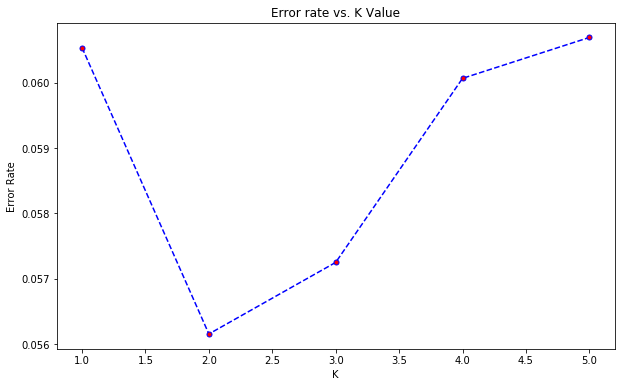

In [55]:
plt.figure(figsize=(10,6))
plt.plot(range(1,6),error,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=5)
plt.title('Error rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [45]:
neighbour=KNeighborsClassifier(n_neighbors=3)
neighbors.fit(xtrain_count,ytrain_count)
pred_y=neighbors.predict(xtest_count)

In [46]:
from sklearn import metrics
count_accuracy_score=metrics.accuracy_score(ytest_count,pred_y)

In [47]:
print(count_accuracy_score*100)

93.93086188018145


In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
print(classification_report(ytest_count,pred_y))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5950
           1       0.95      0.13      0.23       443

    accuracy                           0.94      6393
   macro avg       0.95      0.57      0.60      6393
weighted avg       0.94      0.94      0.92      6393



In [51]:
ytest_count_vector_confusion_matrix=metrics.confusion_matrix(ytest_count,pred_y)

In [52]:
ytest_count_vector_confusion_matrix

array([[5947,    3],
       [ 385,   58]], dtype=int64)

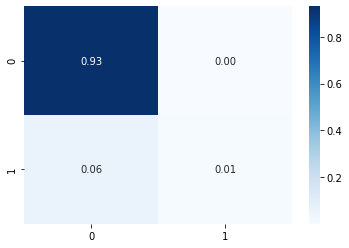

In [54]:
import seaborn as sns
sns.heatmap(ytest_count_vector_confusion_matrix/np.sum(ytest_count_vector_confusion_matrix),annot=True,fmt = '.2f', cmap='Blues')

# Using tdidf vectorizer

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
neighbors_tfidf=KNeighborsClassifier(n_neighbors=1)

In [34]:
neighbors_tfidf.fit(xtrain_tdif,ytrain_tdif)

KNeighborsClassifier(n_neighbors=1)

In [35]:
pred_y_tfidf=neighbors_tfidf.predict(xtest_tdif)

In [36]:
from sklearn import metrics
accuracy_score_tfidf=metrics.accuracy_score(ytest_tdif,pred_y_tfidf)
print(accuracy_score_tfidf*100)

94.74425152510558


In [31]:
error=[]
for i in range(1,10,2):
    neighbors_tfidf=KNeighborsClassifier(n_neighbors=i)
    neighbors_tfidf.fit(xtrain_tdif,ytrain_tdif)
    pred_y_tfidf=neighbors_tfidf.predict(xtest_tdif)
    error.append(np.mean(pred_y_tfidf!=ytest_tdif))

In [33]:
print(error)

[0.05255748474894416, 0.05474737994681683, 0.05912717034256218, 0.06006569685593618, 0.06084780228374785]


Text(0, 0.5, 'Error Rate')

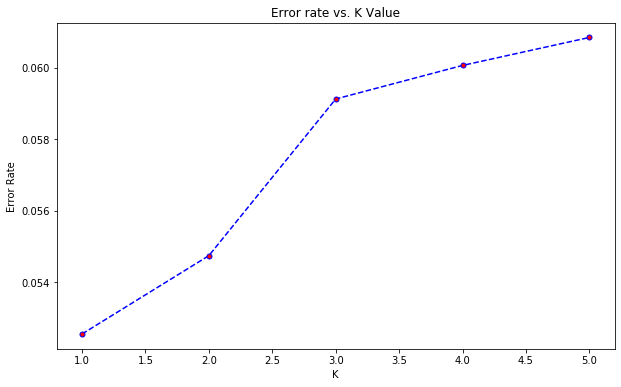

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,6),error,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=5)
plt.title('Error rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [35]:
neighbors=KNeighborsClassifier(n_neighbors=3)
neighbors.fit(xtrain_tdif,ytrain_tdif)
pred_y_tfidf=neighbors.predict(xtest_tdif)

In [36]:
from sklearn import metrics
accuracy_score_tfidf=metrics.accuracy_score(ytest_tdif,pred_y_tfidf)
print(accuracy_score_tfidf)

0.9452526200531832


In [37]:
from sklearn.metrics import confusion_matrix,classification_report

In [38]:
print(classification_report(ytest_tdif,pred_y_tfidf))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5950
           1       0.83      0.26      0.40       443

    accuracy                           0.95      6393
   macro avg       0.89      0.63      0.69      6393
weighted avg       0.94      0.95      0.93      6393



In [39]:
ytest_tfidf_vector_confusion_matrix=metrics.confusion_matrix(ytest_tdif,pred_y_tfidf)

In [40]:
ytest_tfidf_vector_confusion_matrix

array([[5926,   24],
       [ 326,  117]], dtype=int64)

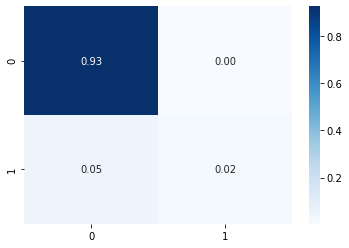

In [41]:
import seaborn as sns
sns.heatmap(ytest_tfidf_vector_confusion_matrix/np.sum(ytest_tfidf_vector_confusion_matrix),annot=True,fmt = '.2f', cmap='Blues')